In [1]:
from selenium import webdriver
from pyquery import PyQuery as pq
driver = webdriver.Chrome('chromedriver.exe')
driver.get('https://www.dcard.tw/topics/{}'.format('感情'))
html = driver.find_element_by_css_selector("*").get_attribute("outerHTML")
doc = pq(html)

In [2]:
doc

[<html>]

## 滑動網頁

In [3]:
import time

#js="var action=document.documentElement.scrollTop=10000000"
#driver.execute_script(js)
#time.sleep(2)

# 爬取熱門文章標題

In [4]:
title = []

for i in range(30):
    html = driver.find_element_by_css_selector("*").get_attribute("outerHTML")
    doc = pq(html)
    info=doc('.sc-1rp9nay-4.iylEpa')   
    
    js="var action=document.documentElement.scrollTop=10000000"
    driver.execute_script(js)
    time.sleep(2)
    
    for data in info:
        if doc(data).text() not in title:   #防止爬到重覆的文章標題
            title.append(doc(data).text())

In [7]:
title

['十件一個人可以做的事 #更',
 '為什麼這種人都有女（男）友',
 '男友眼中的我',
 '女友因為蛋撻不跟我打砲',
 '（圖）26歲時結婚吧\U0001f970',
 '一年後的我們',
 '今天情人節 分手了但心還是暖的',
 '就在剛剛看到老公手機裡的隱藏照片⋯⋯',
 '想把你找回來',
 '（微西斯）停車場激情過後',
 '女友的胸部大不大重要嗎',
 '教你如何有球就閃',
 '對你們來說，何為愛？',
 '#更 #微西斯 做愛後的小動作',
 '隨便交女朋友或許真的有那麼一點不好',
 '身為學妹 一定要學會欲擒故縱',
 '男友做了對不起我的事',
 '閃光有個根本不存在的妹妹 該怎麼辦？',
 '適時放手，也是種成全。',
 '同學有夠綠',
 '台男到底有多可悲',
 '強暴探討（致所有女性）',
 '千萬要保留好國中同學的聯絡方式呀！',
 '對不起~',
 '為甚麼提分手後他可以如此輕易就往前走？',
 '二更 我幹麻討好妳？',
 '真的不能趁另一半酒醉問她問題',
 '更新/男生真的超容易勃起',
 '最後更新：女孩，如果妳是他女友，或妳也喜歡他，請妳注意這個男人。（文長刪照片）',
 '關於鼻樑這件事（微欠扁（（慎入',
 '我真的希望女友別再看愛情電影了',
 '男友在軍中被掰彎。（更',
 '更)我被劈腿四次。所以相信愛情。',
 '一封錯過7年的簡訊',
 '沒買摩托車，我們斷絕關係了',
 '在浴室暈倒（微西斯',
 '#更新「女孩們小心 」比八點黨還誇張的經歷真的不要輕易相信網戀！',
 '同居但不是情侶2',
 '男友起床之後的習慣',
 '男友為了我吃精液（微西斯）',
 '女友去夜店 要放生嗎',
 '最後沒有走在一起 卻一輩子都記得的人',
 '當了牙醫就不能隨便交女朋友？',
 '女友吃半雞吃到哭',
 '#更新 感謝公車讓我得到男友',
 '感情需要兩人一起努力',
 '《因為脫褲子得到男友》-男友篇',
 '你/妳學會獨處了嗎？談獨處在感情中的重要性（文頗長）',
 '關於我追到女神學姐那件大事',
 '#更 昨天，我們打了分手砲',
 '第一次看女朋友喝醉',
 '更/我的極品男友',
 '更/跟男友吵架後他竟然送這個給我！',
 '幹我剛剛遇到夢到好幾天的女生',
 '沒安全感該怎麼辦？',
 '男友

In [8]:
len(title)

373

## 製作簡易文字雲

In [9]:
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator
import jieba
import numpy as np
from collections import Counter

In [10]:
text = ''.join(title)

In [26]:
#設定字典
jieba.set_dictionary('dict.txt.big.txt')

#簡單的自訂字典
jieba.load_userdict(r'userdict.txt')

#設定停用詞
with open(r'stopWord_mayday.txt', 'r', encoding='utf8') as f:  
    stops = f.read().split('\n') 

Building prefix dict from C:\Users\user\2020\dict.txt.big.txt ...
Loading model from cache C:\Users\user\AppData\Local\Temp\jieba.u319db48ab11da9a1c6d98f9232662164.cache
Loading model cost 1.288 seconds.
Prefix dict has been built successfully.


In [27]:
terms = [t for t in jieba.cut(text, cut_all=True) if t not in stops]
sorted(Counter(terms).items(), key=lambda x:x[1], reverse=True) 

[('男友', 62),
 ('女友', 33),
 ('愛', 25),
 ('分手', 20),
 ('真的', 19),
 ('感情', 18),
 ('朋友', 16),
 ('人', 12),
 ('西斯', 11),
 ('文長', 11),
 ('微西斯', 10),
 ('情侶', 10),
 ('男生', 9),
 ('喜歡', 9),
 ('女生', 9),
 ('說', 9),
 ('後', 8),
 ('愛情', 8),
 ('好', 8),
 ('女朋友', 7),
 ('最後', 7),
 ('男朋友', 6),
 ('交往', 6),
 ('脫魯', 6),
 ('結婚', 5),
 ('微', 5),
 ('」', 5),
 ('同居', 5),
 ('吵架', 5),
 ('前女友', 5),
 ('約炮', 5),
 ('謝謝', 5),
 ('事', 4),
 ('男', 4),
 ('情人', 4),
 ('情人節', 4),
 ('做愛', 4),
 ('隨便', 4),
 ('交', 4),
 ('閃光', 4),
 ('另一半', 4),
 ('一半', 4),
 ('女孩', 4),
 ('請', 4),
 ('年', 4),
 ('「', 4),
 ('吃', 4),
 ('遇到', 4),
 ('小', 4),
 ('尿', 4),
 ('告白', 4),
 ('月', 4),
 ('麵', 4),
 ('前男友', 4),
 ('圖', 3),
 ('歲', 3),
 ('年後', 3),
 ('今天', 3),
 ('照片', 3),
 ('學會', 3),
 ('對不起', 3),
 ('同學', 3),
 ('輕易', 3),
 ('注意', 3),
 ('。（', 3),
 ('相信', 3),
 ('關係', 3),
 ('小心', 3),
 ('習慣', 3),
 ('記得', 3),
 ('第一', 3),
 ('送', 3),
 ('夢', 3),
 ('覺得', 3),
 ('妹', 3),
 ('歷程', 3),
 ('間', 3),
 ('失戀', 3),
 ('好像', 3),
 ('爸', 3),
 ('一段', 3),
 ('發現', 3),
 ('單身', 3),
 ('差', 3)

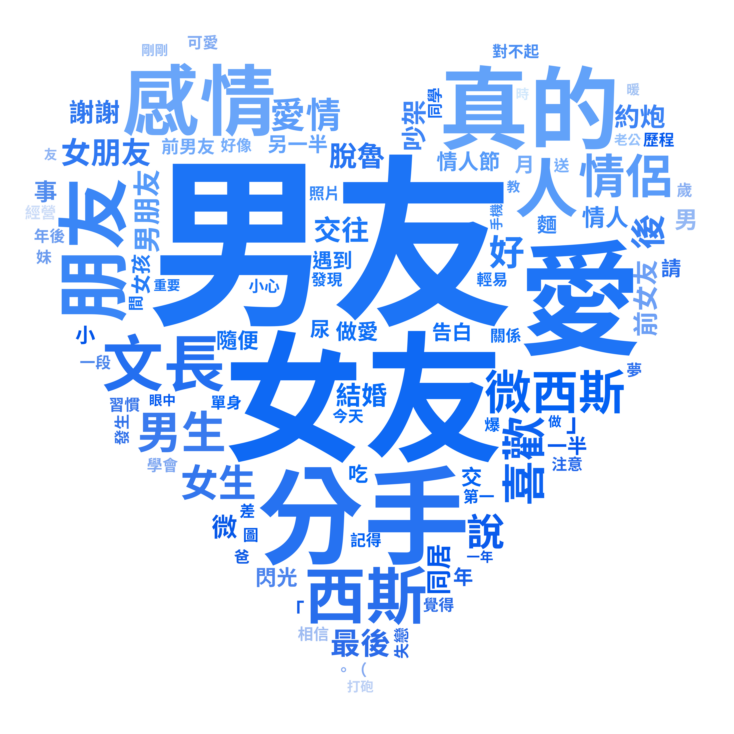

In [28]:
#微軟正黑體
font = 'NotoSansCJKtc-Bold.otf'

#想要文字雲出現的圖示
mk = np.array(Image.open("dcard.jpg"))
 
#其他參數請自行參考wordcloud
my_wordcloud = WordCloud(background_color="white", mask=mk, font_path=font, width=1000, height=1000, margin=2, scale=15, max_words=100)  
my_wordcloud.generate_from_frequencies(frequencies=Counter(terms))

#替文字雲重新上色（依據原圖片上有的色彩）
color = ImageColorGenerator(mk)
my_wordcloud.recolor(color_func = color)

#產生圖片
plt.figure(figsize=(20,10))
plt.imshow(my_wordcloud,interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
#顯示用
plt.show()
 
#存檔
#plt.savefig("Mayday_Wordcloud.png")

### 自訂字典很重要：脫魯、閨密、微西斯等常出現的用詞並沒有收入在基本字典裡
* 所以再建一個簡單的字典是必要的！